In [1]:
import numpy as np

In [12]:
from mpmath import mp


In [8]:
import matplotlib.pyplot as plt

In [2]:
def B(x):
    return (2*x)%1 

In [3]:
def C(x):
    return x/2

In [4]:
x0=np.random.rand()

In [6]:
B(x0)

0.5580820134236959

In [22]:
mp.dps = 100000

In [37]:
x0=mp.mpf(1)/mp.sqrt(mp.mpf(2))

In [ ]:
x0

In [28]:
rng = np.random.default_rng()

In [31]:
rng.random(size=10)<0.5

array([False,  True,  True,  True, False,  True, False, False,  True,
       False])

In [510]:
def BC(p,x0,seed=None,t=1000,history=False):
    if history:
        x_list=np.zeros(t+1,dtype=float)
        x_list[0]=x0
    rng = np.random.default_rng(seed)
    op={True:C,False:B}
    circuit=(rng.random(size=t)<p)
    for idx,cir in enumerate(circuit):
        x0=op[cir](x0)
        if history:
            x_list[idx+1]=(x0)
    if history:
        return x_list
    else:
        return x0



In [73]:
x_list=BC(0.5,x0,0,history=True)

In [209]:
# xf_list=[float(BC(0.,x0,seed,L=100)) for seed in range(10000)]
xf_list=[(BC(0.,x0*seed,seed,L=10000,history=True)) for seed in range(1,1000)]

In [218]:
samples=np.vstack(xf_list)[:,-2:]

In [214]:
np.log2(np.hstack(samples))

/tmp/ipykernel_422466/1456113171.py:1: RuntimeWarning: divide by zero encountered in log2
  np.log2(np.hstack(samples))


array([  -3.5       ,   -4.5       ,   -5.5       , ..., -935.34084087,
       -934.34084087, -933.34084087])

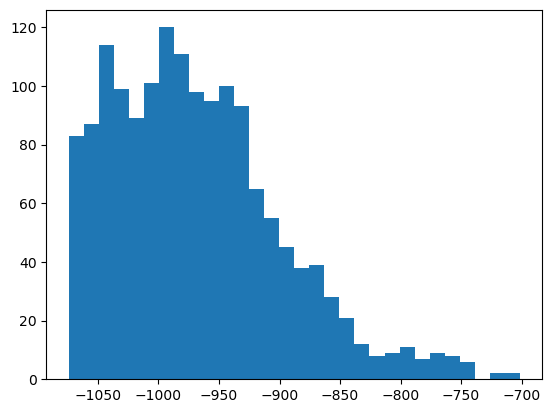

In [219]:
b,h,_=plt.hist(np.log2(np.hstack(samples[samples>0])),bins=30)

/tmp/ipykernel_422466/1104213011.py:1: RuntimeWarning: divide by zero encountered in log2
  plt.plot(h[:-1],np.log2(b))
/tmp/ipykernel_422466/1104213011.py:2: RuntimeWarning: divide by zero encountered in log2
  plt.plot(h[:-1][10:-3],np.log2(b)[10:-3])


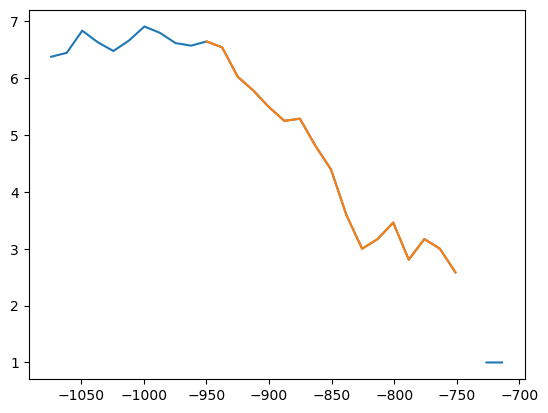

In [221]:
plt.plot(h[:-1],np.log2(b))
plt.plot(h[:-1][10:-3],np.log2(b)[10:-3])


In [222]:
np.polyfit(h[:-1][10:-3],np.log2(b)[10:-3],1)

/tmp/ipykernel_422466/2887647577.py:1: RuntimeWarning: divide by zero encountered in log2
  np.polyfit(h[:-1][10:-3],np.log2(b)[10:-3],1)


array([ -0.02159252, -13.95341144])

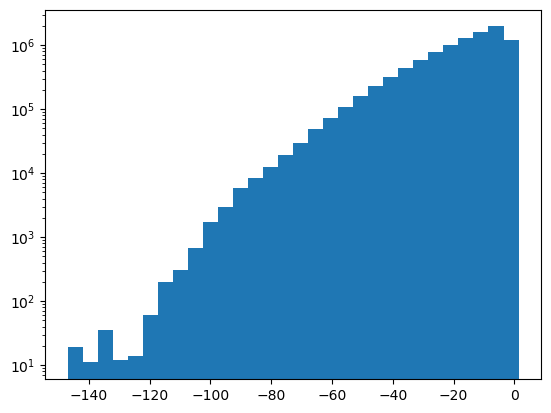

In [206]:
# plt.hist(xf_list,bins=100)
# plt.hist(np.hstack(xf_list),bins=100)
plt.hist(np.log2(np.hstack(samples)),bins=30)
plt.yscale('log')
# plt.xscale('log')

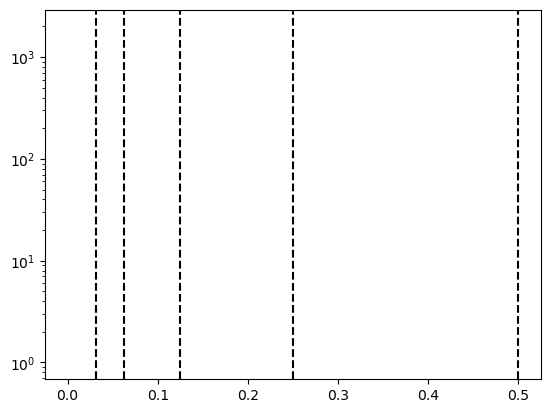

In [228]:
plt.hist((np.hstack(samples)),bins=30)
[plt.axvline(1/2**i,ls='--',color='k') for i in range(1,6)]
plt.yscale('log')

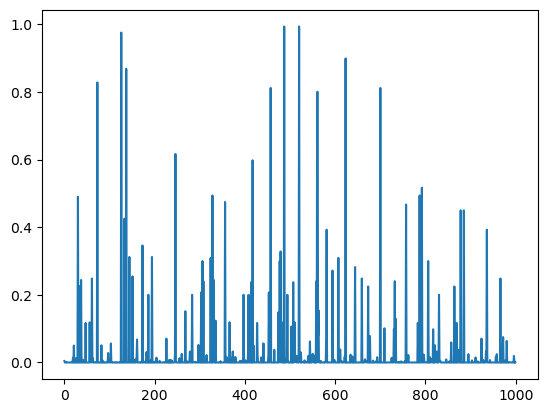

In [54]:
plt.plot(xf_list)

In [ ]:
x_list

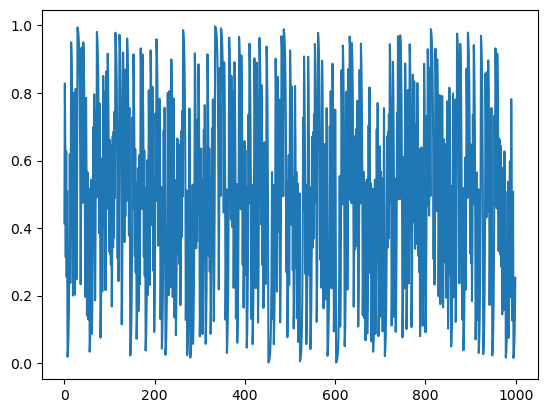

In [27]:
plt.plot(x_list)
# plt.xlim(0,100)

# Lyaponov exponent

In [525]:
def lyapunov(p,seed,dx=1e-10):
    traj1=BC(p,x0/10**20,seed,t=30,history=True)
    traj2=BC(p,x0/10**20+dx,seed,t=30,history=True)
    # return traj1,traj2
    diff_=np.abs(traj2-traj1)
    diff_[diff_>0.5]=1-diff_[diff_>0.5]
    return diff_/dx

In [520]:
t1,t2=lyapunov(0.95,0,1e-25)

In [ ]:
t1

In [ ]:
t2

In [ ]:
plt.plot(t1-t2)
# plt.plot(t2)

In [562]:
lamda_list=[]
p_list=np.linspace(0,1,11)
for p in p_list:
    diff_list=np.array([lyapunov(p,seed,1e-25) for seed in range(200)])
    lamda=(np.log2(diff_list[:,1:])/np.arange(1,31)).mean(axis=0)
    lamda_list.append(lamda[-1])


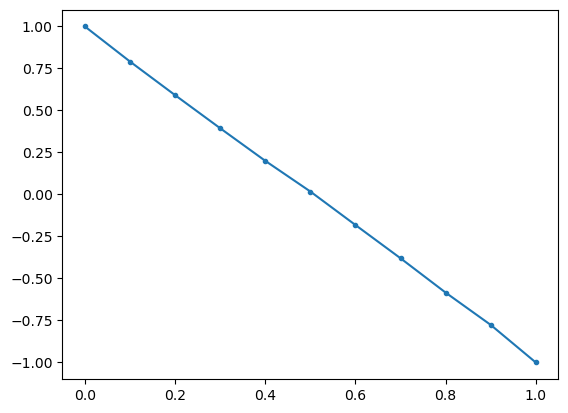

In [565]:
plt.plot(p_list,lamda_list,'.-')

In [553]:
diff_list[0]

array([1.00000000e+00, 5.00000000e-01, 2.50000000e-01, 1.25000000e-01,
       6.25000000e-02, 3.12500000e-02, 1.56250000e-02, 7.81250000e-03,
       3.90625000e-03, 1.95312500e-03, 9.76562500e-04, 4.88281250e-04,
       2.44140625e-04, 1.22070312e-04, 6.10351562e-05, 3.05175781e-05,
       1.52587891e-05, 7.62939453e-06, 3.81469727e-06, 1.90734863e-06,
       9.53674316e-07, 4.76837158e-07, 2.38418579e-07, 1.19209290e-07,
       5.96046448e-08, 2.98023224e-08, 1.49011612e-08, 2.98023224e-08,
       5.96046448e-08, 2.98023224e-08, 1.49011612e-08])

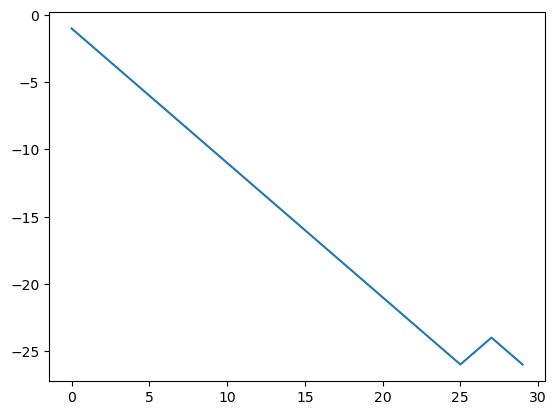

In [554]:
plt.plot(np.log2(diff_list[0][1:]))
# plt.yscale('log')

In [555]:
(np.log2(diff_list[:,1:])/np.arange(1,31)).mean(axis=0)

array([-0.88      , -0.9       , -0.91333333, -0.9025    , -0.906     ,
       -0.89833333, -0.89571429, -0.8925    , -0.89333333, -0.888     ,
       -0.88727273, -0.88916667, -0.88769231, -0.885     , -0.88066667,
       -0.87625   , -0.87705882, -0.87944444, -0.87842105, -0.8805    ,
       -0.88238095, -0.88363636, -0.88478261, -0.88541667, -0.8852    ,
       -0.88692308, -0.88592593, -0.88535714, -0.88448276, -0.886     ])

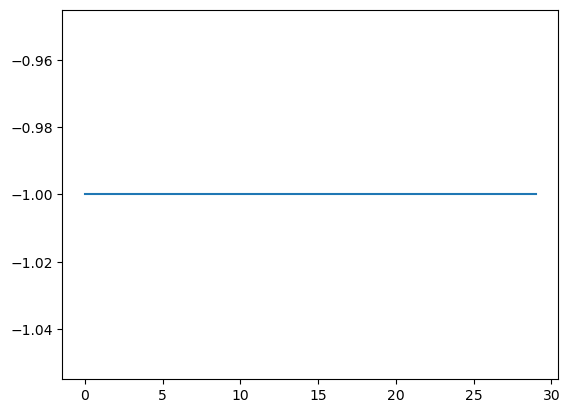

In [550]:
# plt.plot(np.log2(diff_list[1])/np.arange(1,31))
plt.plot((np.log2(diff_list[:,1:])/np.arange(1,31)).mean(axis=0))

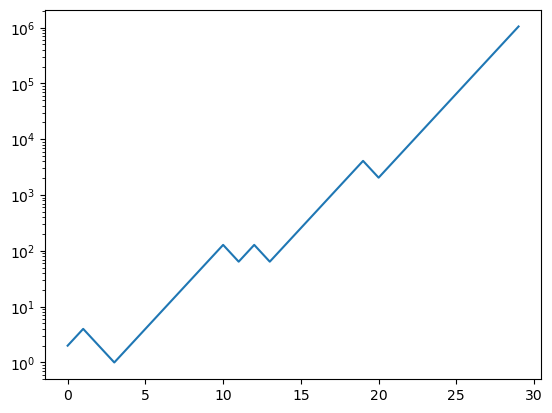

In [466]:
# plt.plot(diff_list.mean(axis=0))
plt.plot(diff_list[0])
plt.yscale('log')

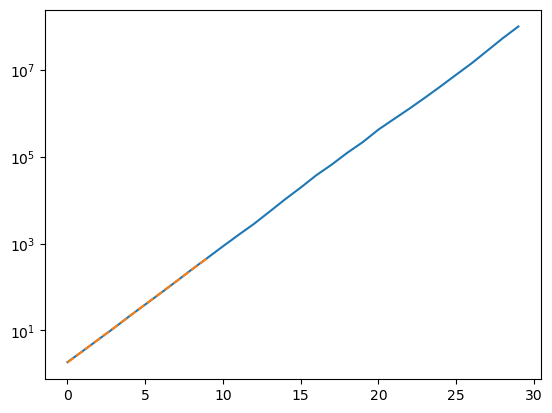

In [467]:
first,last=0,10
rs=np.polyfit(np.arange(first,last),np.log2(diff_list.mean(axis=0))[first:last],1)

plt.plot(diff_list.mean(axis=0))
plt.yscale('log')

plt.plot(np.arange(first,last), 2**np.polyval(rs,np.arange(first,last)),ls='--')

In [468]:
rs

array([0.88717544, 0.87525283])

In [ ]:
for p in np.arange(0,0.5,6):
diff_list=np.array([lyapunov(p.,seed) for seed in range(200)])

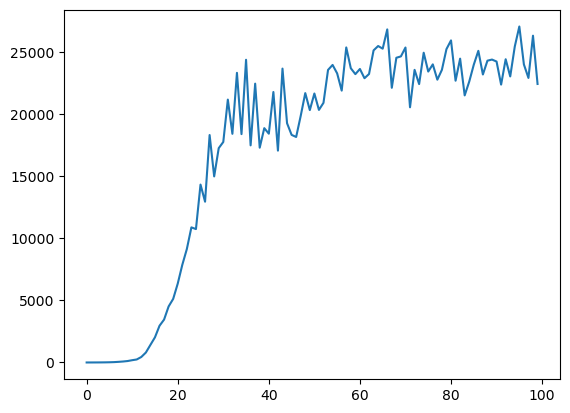

In [315]:
plt.plot(np.mean(diff_list,axis=0))

In [297]:
diff_=np.abs(traj2-traj1)

In [298]:
diff_[diff_>0.5]=1-diff_[diff_>0.5]

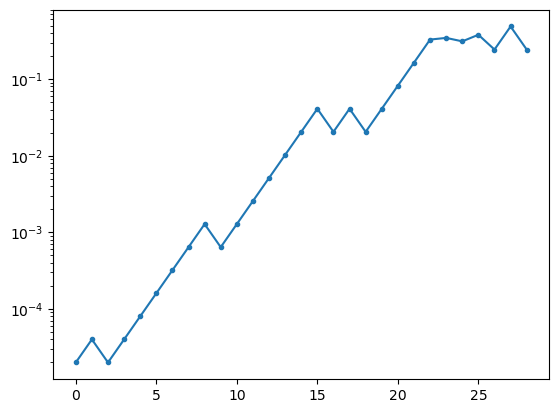

In [299]:
plt.plot(diff_[:29],'.-')
# plt.plot(diff_[:15],'.-')
# plt.xlim(0,100)
plt.yscale('log')

In [300]:
np.polyfit(np.arange(29),np.log2(diff_[:29]),1)

array([  0.55631988, -15.02197288])

In [ ]:
np.polyfit(np.arange(15),np.log2(diff_[:15]),1)

array([  1.        , -15.60964047])